**Step 1: 道具（ライブラリ）を揃える**

分析に必要な「計算用の道具」を呼び出します。

pndas : 表計算 pd

numpy : 数学 np

In [2]:
import pandas as pd
import numpy as np

**Step 2: データを読み込む**

現場にある台帳（CSVファイル）を開きます。

train.csv : 学習用の台帳

test.csv : 本番予測用の台帳

解説: pd.read_csv は、Excelファイルを開くようなボタンだと思ってください。読み込んだデータは train という名前の箱に入ります。

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

**Step 3: 現場の中身をチラッと見る**

台帳がちゃんと開けたか、最初の5行だけ確認します。

.head() : 最初の5行だけ

解説: これでエイムズの街の「広さ」「築年数」「外壁」などのデータがズラーッと並んで見えたら、捜査開始です！

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**今日の「難しい名前コード」：Import（インポート）**

意味: 外部から便利なツールキットを自分の机（プログラム）に持ってくること。

解説: Pythonは最初から全部できるわけではなく、「表計算がしたいならpandasを持ってきてね」というスタイルです。

In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**難しい名前コードの意味：**

Dtype (データタイプ)：その列が「整数(int)」「小数(float)」「文字(object)」のどれかを示します。

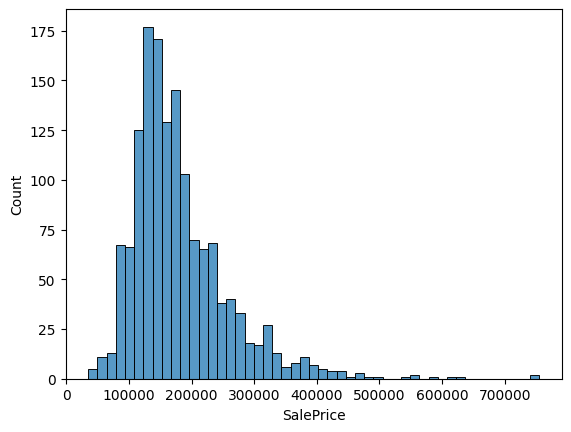

In [6]:
import matplotlib .pyplot as plt
import seaborn as sns
sns.histplot(train['SalePrice'])
plt.show()

**今回の「難しい名前」解説**

Distribution（ディストリビューション / 分布）

意味: データが**「どこに、どのくらい集まっているか」**という広がり方のことです。

Skewness（スキューネス / 歪度）

意味: グラフの**「ゆがみ」**のこと。住宅価格のグラフは、安い家が多くて高い家が少ないので、右側にひょろっと伸びた形になります

**1. matplotlib（マットプロットリブ）**

一言でいうと、**「Python専用の、グラフ作成ツール」**のことです。

意味: データを数字の羅列（表）として見るだけでなく、棒グラフや折れ線グラフといった「図」にするためのライブラリ（道具箱）です。

なぜ重要か: データ分析の目的は、数字から「傾向」を読み取ることです。人間にとって、1000行の数字を見るより、1つのグラフを見るほうが圧倒的に理解が早いからです。

**Library（ライブラリ）**

意味: 「便利な道具セット」。matplotlib もその一つです。自分で一からグラフを描くプログラムを書くのは大変ですが、ライブラリを使えば数行で済みます。

In [7]:
print(train.isnull().sum()[train.isnull().sum() > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**今回の「難しい名前」解説**

Missing Values（ミッシング・バリュー / 欠損値）

意味: **「データの穴」**です。Amesのデータでは、例えば「暖炉がない家」の「暖炉の質」の項目が空欄（NaN）になっていたりします。

Boolean Indexing（ブーリアン・インデキシング）

意味: **「条件に合うものだけ取り出す」**こと。上のコードの [... > 0] の部分です。「空欄が0より大きい列だけ教えて！」と指示しています。

In [8]:
train_fixed = train.fillna(0)
print(train_fixed.isnull().sum().sum())

0


**今日の「難しい名前」解説**

Imputation（インピュテーション / 補完）

意味: 「穴埋め」。欠けているデータに、何らかの値を代入して補う作業の総称です。

Data Integrity（データ・インテグリティ / データの整合性）

意味: 「データがちゃんとしていること」。穴や矛盾がなく、分析に使える正しい状態であることを指します。

**Variable Name（バリアブル・ネーム / 変数名）**

意味: 「データの入れ物の名前」。今回の train_fixed のこと。「これは修正後のデータですよ」というラベルを貼るイメージです。

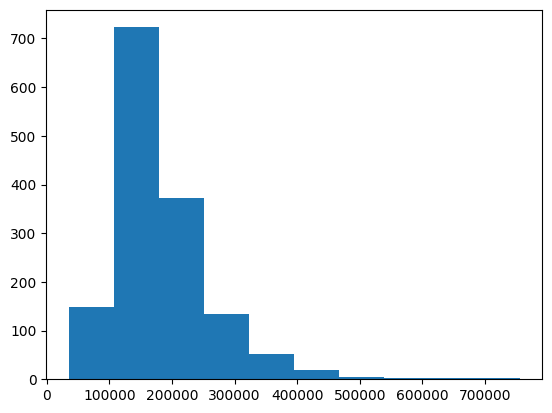

In [9]:
import matplotlib.pyplot as plt
plt. hist(train_fixed['SalePrice'])
plt.show()

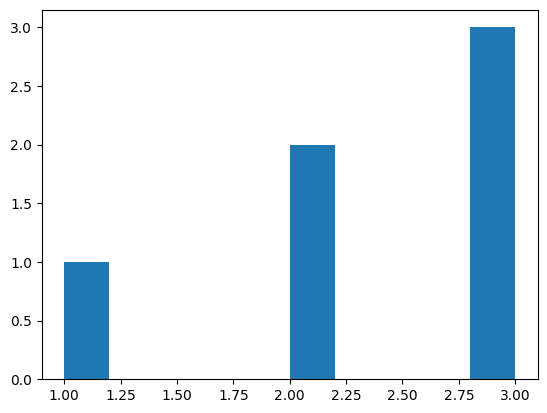

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
plt.hist([1,2,2,3,3,3])
plt.show()

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

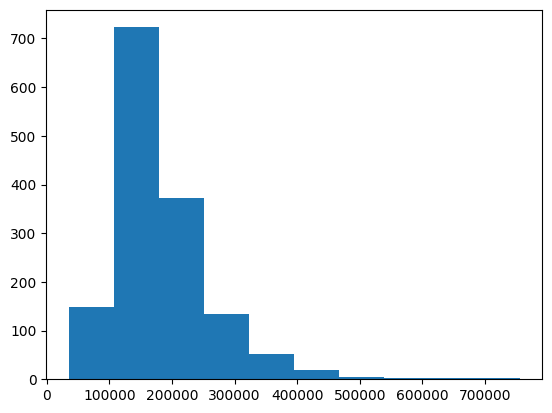

In [11]:
plt.hist(train['SalePrice'])

「trainのデータの」 → train

「SalePriceの列から」 → ['SalePrice']

「データを元にヒストグラムを作れ」 → .hist() または plt.hist()




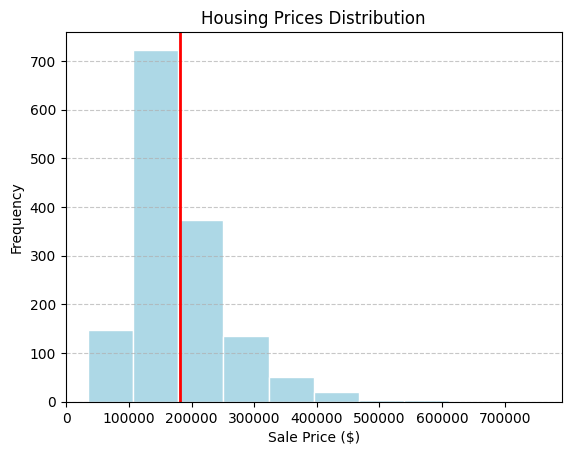

In [14]:
plt.hist(train['SalePrice'], color='lightblue', edgecolor='white')
plt.title('Housing Prices Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(train['SalePrice'].mean(), color='red', linestyle='-', linewidth=2)
plt.show()

「基本のヒストグラムに color 引数を追加して、lightblue（水色）にカスタマイズした。引数によるグラフの調整方法を学んだ。」

タイトルをつける（作品にする）

横軸の Sale Price ($)と縦軸の Frequencyを追加

水色の棒グラフに、**白い（white）の縁取り（edgecolor）**をつけて、1本ずつの区切りをはっきりさせた。

「**y軸（縦方向）**の目盛りに合わせて、**点線（'--'）のガイドを引きなさい。ただし、グラフの邪魔をしないように少し透かして（alpha=0.7）**ね」

**1.**    　1枚目: 基本の形（タイトルと横軸）

**2.**   　2枚目: 縦軸の「名札（Frequency）」がついて、図解として親切に

**3.**   　3枚目: 白い縁取り（edgecolor）で、データの塊がパキッと独立

**4.**  　 4枚目（最新）: 補助線（grid）が入り、**「正確に読み取れるグラフ」**へ

「**垂直な線（axvline）を引きなさい。場所は SalePrice の平均値（mean）のところで。色は目立つように赤（red）**にしてね」

これを足すと、グラフの山に対して、平均的な家の価格がどこにあるのかが一目でわかります。

**5.**  　 5枚目（平均値に赤い線を引く（←今ここ！）